In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# traigo mis funciones
import sys

sys.path.append('../src') #pongo los 2 puntos para que salga de la carpeta
import soporte_funciones as sf
import soporte_encoding as se

# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, TargetEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from category_encoders import TargetEncoder

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../datos_3/datos_limpios.csv', index_col=0)
df.head()

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,status,floor,hasLift
0,750.0,flat,60.0,True,1,1,Madrid,7037,good,3,True
1,750.0,flat,70.0,True,2,1,San Sebastián de los Reyes,16145,good,bj,False
2,400.0,penthouse,67.0,True,2,2,Villamanrique de Tajo,55041,good,2,False
3,590.0,flat,70.0,True,3,2,Rascafría,56596,good,Desconocido,False
4,684.0,studio,45.0,True,0,1,Madrid,10656,Desconocido,Desconocido,Desconocido


In [3]:
df['rooms'] = df['rooms'].astype(str)
df['bathrooms'] = df['bathrooms'].astype(str)

In [4]:
df['exterior'] = df['exterior'].astype(str)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 0 to 352
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         353 non-null    float64
 1   propertyType  353 non-null    object 
 2   size          353 non-null    float64
 3   exterior      353 non-null    object 
 4   rooms         353 non-null    object 
 5   bathrooms     353 non-null    object 
 6   municipality  353 non-null    object 
 7   distance      353 non-null    int64  
 8   status        353 non-null    object 
 9   floor         353 non-null    object 
 10  hasLift       353 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 33.1+ KB


In [6]:
df_num, df_cat = sf.separar_dataframe(df)

In [7]:
lista_col_categ =  df.select_dtypes(include='O').columns.tolist()

Index(['propertyType', 'exterior', 'rooms', 'bathrooms', 'municipality',
       'status', 'floor', 'hasLift'],
      dtype='object')


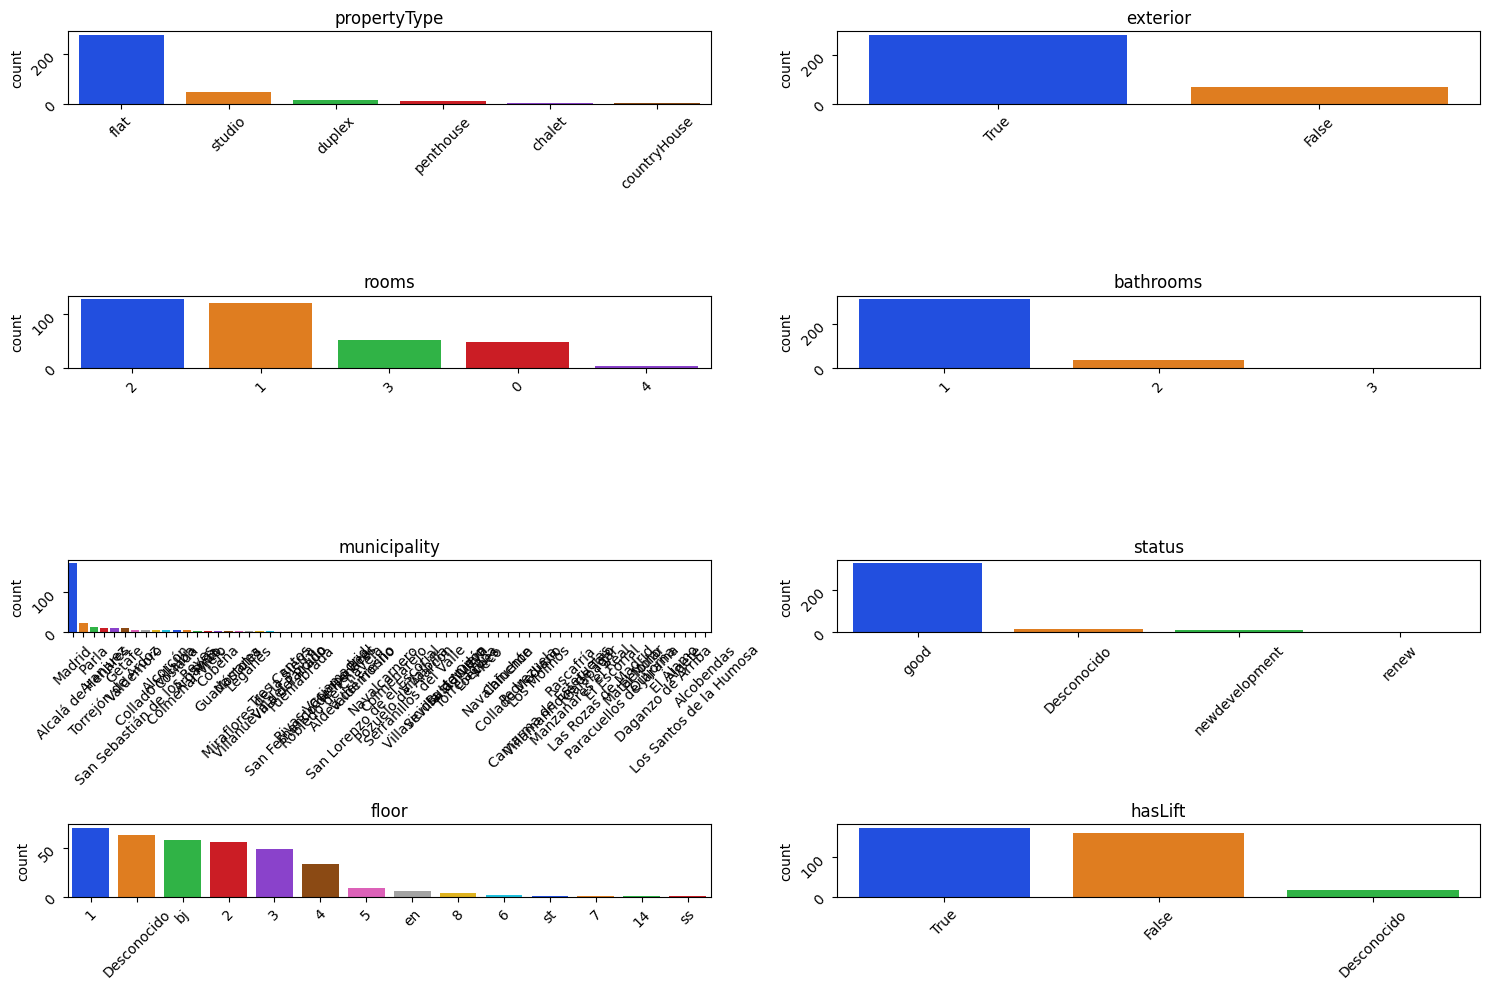

In [8]:
sf.plot_categoricas(df_cat)

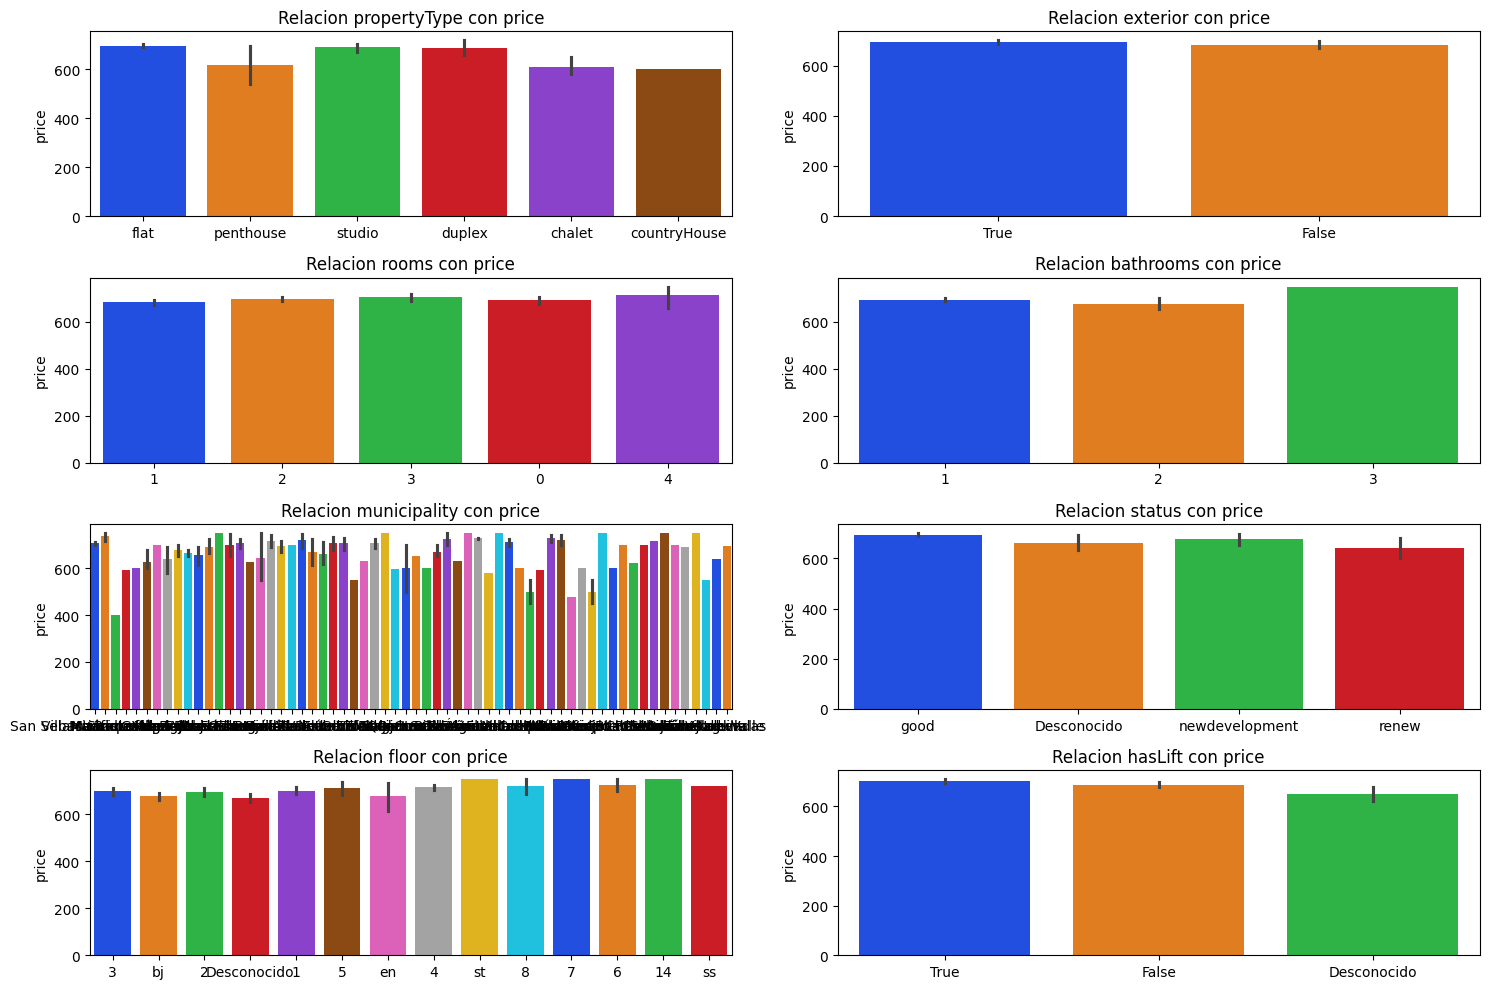

In [9]:
sf.visualizar_categoricas(df, lista_col_categ, 'price', tipo_grafica='barplot')

In [10]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")


for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable PROPERTYTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable propertyType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['flat', 'penthouse', 'studio', 'duplex', 'chalet', 'countryHouse']

Realizando test de Kruskal...
Estadístico de prueba: 10.491276765664804
Valor p: 0.062453362538402654
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-10.0000,1.0000,-207.3147,187.3147,chalet-countryHouse
1,79.2857,0.2949,-29.4294,188.0008,chalet-duplex
2,87.5596,0.1184,-11.6306,186.7497,chalet-flat
3,9.9000,0.9999,-102.5867,122.3867,chalet-penthouse
4,79.6250,0.2206,-22.0687,181.3187,chalet-studio
5,89.2857,0.6984,-87.5915,266.1629,countryHouse-duplex
6,97.5596,0.5771,-73.6282,268.7473,countryHouse-flat
7,19.9000,0.9996,-159.3200,199.1200,countryHouse-penthouse
8,89.6250,0.6724,-83.0254,262.2754,countryHouse-studio
9,8.2739,0.9959,-38.5355,55.0832,duplex-flat



###########################

Estamos analizando la variable EXTERIOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable exterior las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 10691.5
Valor p: 0.18180926288442967
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,10.5531,0.2026,-5.7056,26.8119,False-True



###########################

Estamos analizando la variable ROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable rooms las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3', '0', '4']

Realizando test de Kruskal...
Estadístico de prueba: 6.997445029790361
Valor p: 0.13602330549397834
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-8.2043,0.9324,-36.5585,20.1500,0-1
1,7.1116,0.9579,-21.0183,35.2415,0-2
2,14.3736,0.7616,-18.9648,47.7121,0-3
3,22.4762,0.9720,-77.1164,122.0688,0-4
4,15.3159,0.2789,-5.9159,36.5476,1-2
5,22.5779,0.1712,-5.1881,50.3438,1-3
6,30.6804,0.9113,-67.1878,128.5487,1-4
7,7.2620,0.9511,-20.2748,34.7988,2-3
8,15.3646,0.9928,-82.4389,113.1680,2-4
9,8.1026,0.9994,-91.3242,107.5293,3-4



###########################

Estamos analizando la variable BATHROOMS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable bathrooms las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['1', '2', '3']

Realizando test de Kruskal...
Estadístico de prueba: 2.17914787981004
Valor p: 0.3363597726585303
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-16.9578,0.2492,-41.9852,8.0696,1-2
1,55.4476,0.6376,-88.7934,199.6886,1-3
2,72.4054,0.4733,-73.5403,218.3511,2-3



###########################

Estamos analizando la variable MUNICIPALITY
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable municipality las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Madrid', 'San Sebastián de los Reyes', 'Villamanrique de Tajo', 'Rascafría', 'Manzanares el Real', 'Miraflores de la Sierra', 'Galapagar', 'Arganda', 'San Lorenzo de el Escorial', 'Aldea del Fresno', 'Aranjuez', 'Villanueva del Pardillo', 'Las Rozas de Madrid', 'Navalcarnero', 'Alcalá de Henares', 'El Escorial', 'Leganés', 'Coslada', 'Torrejón de Ardoz', 'Camarma de Esteruelas', 'Alcorcón', 'Pinto', 'Valdemoro', 'Collado Villalba', 'Getafe', 'Paracuellos de Jarama', 'El Molar', 'Parla', 'Tres Cantos', 'Quijorna', 'Valdemorillo', 'Pedrezuela', 'Daganzo de Arriba', 'Guadarrama', 'Cobeña', 'El Álamo', 'Algete', 'Rivas-Vaciamadrid', 'Los Santos de la Humosa', 'San Fernando de Henares', 'Fuenlabrada', 'Mata

,meandiff,p-adj,lower,upper,group_diff
0,-10.0909,1.0000,-218.6427,198.4609,Alcalá de Henares-Alcobendas
1,14.9091,1.0000,-79.0315,108.8497,Alcalá de Henares-Alcorcón
2,-42.5909,1.0000,-193.2310,108.0492,Alcalá de Henares-Aldea del Fresno
3,44.9091,1.0000,-163.6427,253.4609,Alcalá de Henares-Algete
4,-51.0000,0.8634,-126.3201,24.3201,Alcalá de Henares-Aranjuez
...,...,...,...,...,...
1886,48.6667,1.0000,-186.8549,284.1882,Villalbilla-Villanueva del Pardillo
1887,-40.0000,1.0000,-328.4538,248.4538,Villalbilla-Villaviciosa de Odón
1888,288.6667,0.0011,53.1451,524.1882,Villamanrique de Tajo-Villanueva del Pardillo
1889,200.0000,0.8228,-88.4538,488.4538,Villamanrique de Tajo-Villaviciosa de Odón



###########################

Estamos analizando la variable STATUS
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable status las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['good', 'Desconocido', 'newdevelopment', 'renew']

Realizando test de Kruskal...
Estadístico de prueba: 11.541040965775425
Valor p: 0.009132723494666343
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,32.8153,0.2012,-10.1772,75.8078,Desconocido-good
1,13.8791,0.9349,-46.7829,74.5412,Desconocido-newdevelopment
2,-22.4286,0.9621,-141.4847,96.6276,Desconocido-renew
3,-18.9361,0.6914,-63.4855,25.6132,good-newdevelopment
4,-55.2438,0.5785,-166.9538,56.4662,good-renew
5,-36.3077,0.8619,-155.9349,83.3195,newdevelopment-renew



###########################

Estamos analizando la variable FLOOR
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable floor las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['3', 'bj', '2', 'Desconocido', '1', '5', 'en', '4', 'st', '8', '7', '6', '14', 'ss']

Realizando test de Kruskal...
Estadístico de prueba: 31.48890585086721
Valor p: 0.002858350329048415
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,48.2429,0.9999,-156.8821,253.3678,1-14
1,-5.5786,1.0000,-42.0943,30.9372,1-2
2,-3.7780,1.0000,-41.9469,34.3909,1-3
3,13.8489,0.9983,-29.1592,56.8571,1-4
4,12.6873,1.0000,-59.4370,84.8116,1-5
...,...,...,...,...,...
86,41.6552,1.0000,-163.7684,247.0787,bj-ss
87,71.6552,0.9962,-133.7684,277.0787,bj-st
88,40.8333,1.0000,-179.1611,260.8277,en-ss
89,70.8333,0.9983,-149.1611,290.8277,en-st



###########################

Estamos analizando la variable HASLIFT
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable hasLift las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['True', 'False', 'Desconocido']

Realizando test de Kruskal...
Estadístico de prueba: 13.627872283280148
Valor p: 0.0010983610754482008
Hay una diferencia significativa entre los grupos
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,37.4113,0.0345,2.1662,72.6565,Desconocido-False
1,52.0307,0.0016,16.9181,87.1432,Desconocido-True
2,14.6193,0.0694,-0.8887,30.1274,False-True



###########################



- PropertyType: no hay diferencia.
- exterior: no hay diferencia.
- rooms: no hay diferencia.
- bathrooms: no hay diferencia.
- municipality: hay diferencia.
- status: hay diferencia
- floor: hay diferencia.
- haslift: hay diferencia.

In [11]:
diccionario_encoding = {"onehot": ['propertyType', 'exterior', 'rooms', 'bathrooms'], # no metemos ninguna columna porque todas nuestras columnas tienen orden
                        "dummies": [], # no metemos ninguna columna porque todas tienen orden
                        'ordinal' : {
                                    },
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": [], # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
                        "target": ["", "", "", ""]
                        }

In [12]:
encoding = se.Encoding(df, diccionario_encoding, "price")
df_encode = encoding.one_hot_encoding()
df_encode.head()

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3
0,750.0,flat,60.0,True,1,1,Madrid,7037,good,3,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,750.0,flat,70.0,True,2,1,San Sebastián de los Reyes,16145,good,bj,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,400.0,penthouse,67.0,True,2,2,Villamanrique de Tajo,55041,good,2,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,590.0,flat,70.0,True,3,2,Rascafría,56596,good,Desconocido,False,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,684.0,studio,45.0,True,0,1,Madrid,10656,Desconocido,Desconocido,Desconocido,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
df_encode.shape

(353, 27)

In [14]:
encoder = TargetEncoder(cols = df_encode.select_dtypes("O").columns)
df_final = encoder.fit_transform(X = df_encode, y = df["price"])

In [15]:
df_final.head()

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,status,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_False,exterior_True,rooms_0,rooms_1,rooms_2,rooms_3,rooms_4,bathrooms_1,bathrooms_2,bathrooms_3
0,750.0,697.559567,60.0,694.964912,682.653315,694.552381,705.594114,7037,695.243827,697.689843,702.252872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,750.0,697.559567,70.0,694.964912,697.968647,694.552381,701.418584,16145,695.243827,678.664014,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,400.0,673.290678,67.0,694.964912,697.968647,679.963693,654.819074,55041,695.243827,696.092223,687.633544,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,590.0,697.559567,70.0,694.964912,704.749079,679.963693,679.539684,56596,695.243827,670.416613,687.633544,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,684.0,689.814572,45.0,694.964912,690.965355,694.552381,705.594114,10656,682.123310,670.416613,673.705516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
columnas_eliminar = ['propertyType', 'exterior', 'rooms', 'bathrooms']

In [17]:
df_final.drop(columns=columnas_eliminar, inplace=True)

In [19]:
df_final.to_csv('..\\datos_3\\df_encoded.csv')